## 알고리즘 예제 6.1

문제 정의 : 기수 정렬 

알고리즘 설명 

1. from queue import Queue 문장을 이용하여 queue 모듈의 클래스 Queue를 queue.Queue가 아니라 Queue로 바로 사용할 수 있도록 해준다.

2. 필요한 큐의 리스트를 준비한다. BUCKETS개의 공백 큐를 만든다.

3. 1의 자리부터 큰 자리로 올라가면서 정렬하게 한다.

4. 버킷의 위치를 계산((A[i]//factor) % BUCKETS)하고 그 버킷에 숫자를 넣는다. 

5. 모든 버킷에서 숫자를 순서대로 꺼내 원래의 리스트에 저장하고 끝나면, 다음 자릿수를 처리한다. 

6. 현재 리스트의 내용(중간 처리과정)을 보여주기 위한 임시 코드를 만든다. 

손으로 푼 예제 :

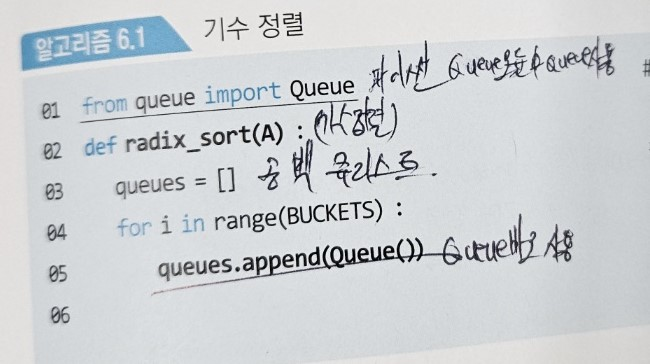

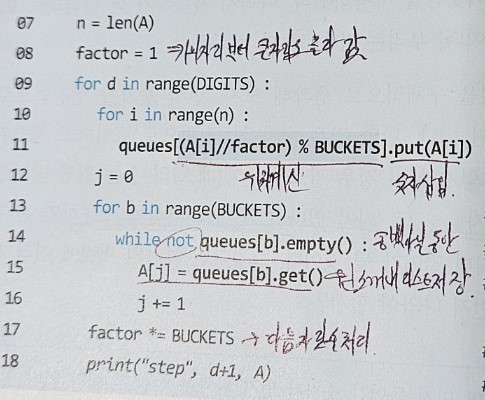

코드 개요 : 기수 정렬 함수(radix_sort(A))

입력 변수 : 1~9999 사이의 난수 생성 (import random), 10자리 버킷(BUCKETS = 10), 최대 4자릿수(DIGITS = 4)

출력 변수 : 기수 정렬한 data[](radix_sort(data))

In [3]:
#알고리즘 코드

from queue import Queue
def radix_sort(A) :
    queues = []
    for i in range(BUCKETS) :
        queues.append(Queue())

    n = len(A)
    factor = 1
    for d in range(DIGITS) :
        for i in range(n) :
            queues[(A[i]//factor) % BUCKETS].put(A[i])
        j = 0
        for b in range(BUCKETS) :
            while not queues[b].empty() :
                A[j] = queues[b].get()
                j += 1
        factor *= BUCKETS
        print("step", d+1, A)

In [4]:
#테스트 코드

import random
BUCKETS = 10
DIGITS = 4
data = []
for i in range(10) :
    data.append(random.randint(1,9999))
radix_sort(data)
print("Radix:", data)


step 1 [1950, 9320, 855, 5355, 8026, 9196, 7147, 6417, 6389, 2259]
step 2 [6417, 9320, 8026, 7147, 1950, 855, 5355, 2259, 6389, 9196]
step 3 [8026, 7147, 9196, 2259, 9320, 5355, 6389, 6417, 855, 1950]
step 4 [855, 1950, 2259, 5355, 6389, 6417, 7147, 8026, 9196, 9320]
Radix: [855, 1950, 2259, 5355, 6389, 6417, 7147, 8026, 9196, 9320]


수행 결과

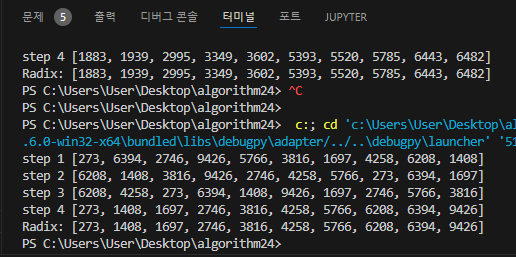

복잡도 분석

외부루프(for d in range(DIGITS))는 항상 DIGITS번 반복된다. 숫자를 삽입하는 내부루프(for i in range(n))는 정확히 n번 반복된다. 그렇기에 이중 루프(for b in range(BUCKETS) : while not queues[b].empty() :)로 기술된 항목을 꺼내는 과정은 전체 버킷에 들어있는 항목의 수만큼 반복될 것이고, 이것은 입력의 개수 n과 같다. 따라서 T(n) = d(n+n)이고, O(d*n)의 시간복잡도를 갖는다.